# Pengantar Probabilitas dan Statistik
Dalam notebook ini, kita akan mengeksplorasi beberapa konsep yang telah kita bahas sebelumnya. Banyak konsep dari probabilitas dan statistik yang terwakili dengan baik dalam pustaka utama untuk pemrosesan data di Python, seperti `numpy` dan `pandas`.


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## Variabel Acak dan Distribusi
Mari kita mulai dengan mengambil sampel sebanyak 30 nilai dari distribusi uniform dari 0 hingga 9. Kita juga akan menghitung rata-rata dan varians.


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


Untuk memperkirakan secara visual berapa banyak nilai berbeda yang ada dalam sampel, kita dapat membuat **histogram**:


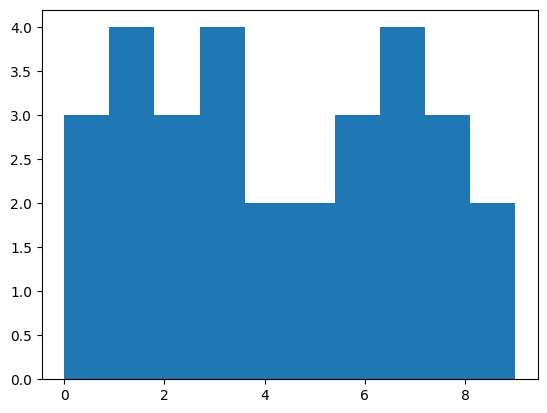

In [119]:
plt.hist(sample)
plt.show()

## Menganalisis Data Nyata

Rata-rata dan variansi sangat penting saat menganalisis data dunia nyata. Mari kita muat data tentang pemain baseball dari [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


Kita menggunakan paket bernama [**Pandas**](https://pandas.pydata.org/) di sini untuk analisis data. Kita akan membahas lebih lanjut tentang Pandas dan cara bekerja dengan data di Python nanti dalam kursus ini.

Mari kita hitung nilai rata-rata untuk usia, tinggi badan, dan berat badan:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

Sekarang mari kita fokus pada tinggi, dan hitung standar deviasi dan varians:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


Selain rata-rata, masuk akal untuk melihat nilai median dan kuartil. Nilai-nilai tersebut dapat divisualisasikan menggunakan **box plot**:


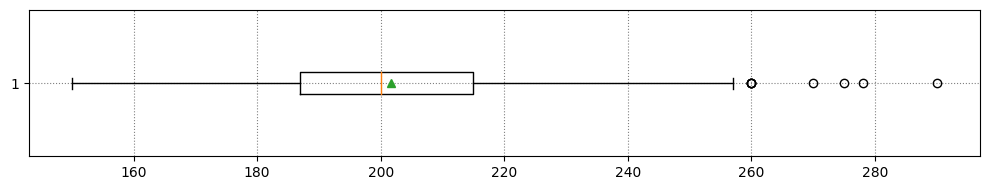

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

Kita juga dapat membuat diagram kotak dari subset dataset kita, misalnya, dikelompokkan berdasarkan peran pemain.


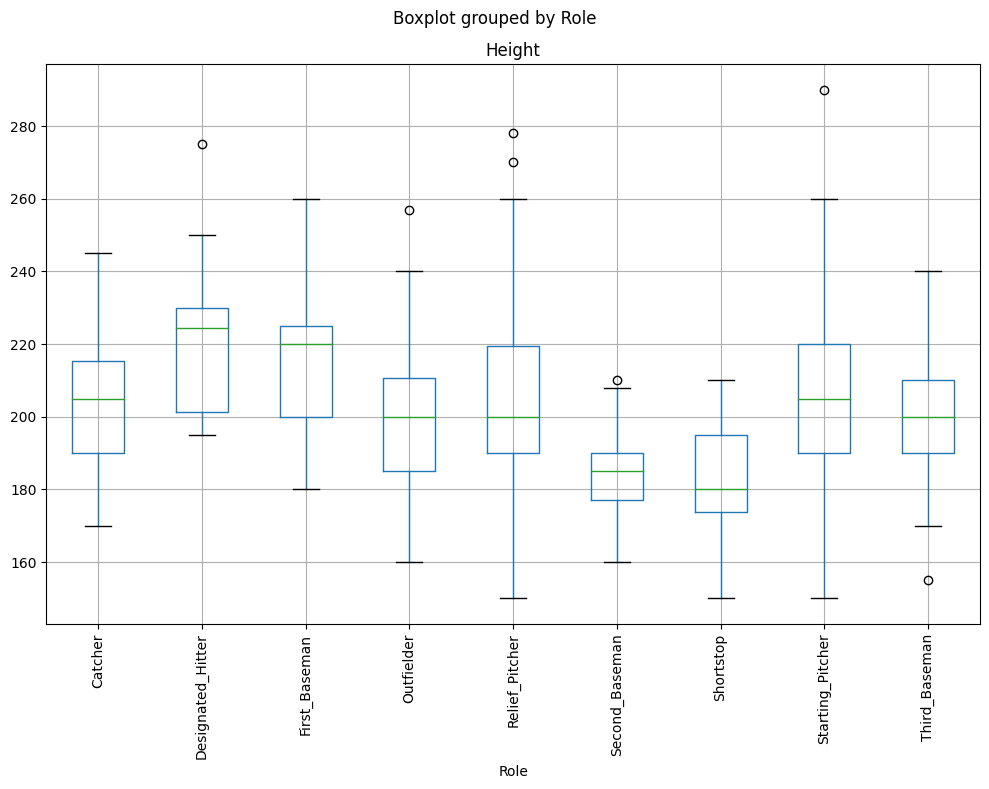

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **Catatan**: Diagram ini menunjukkan bahwa, rata-rata, tinggi badan pemain base pertama lebih tinggi dibandingkan dengan pemain base kedua. Nantinya kita akan belajar bagaimana menguji hipotesis ini secara lebih formal, dan bagaimana menunjukkan bahwa data kita secara statistik signifikan untuk membuktikannya.

Usia, tinggi badan, dan berat badan semuanya adalah variabel acak kontinu. Menurutmu, bagaimana distribusinya? Cara yang baik untuk mengetahuinya adalah dengan membuat histogram dari nilai-nilainya:


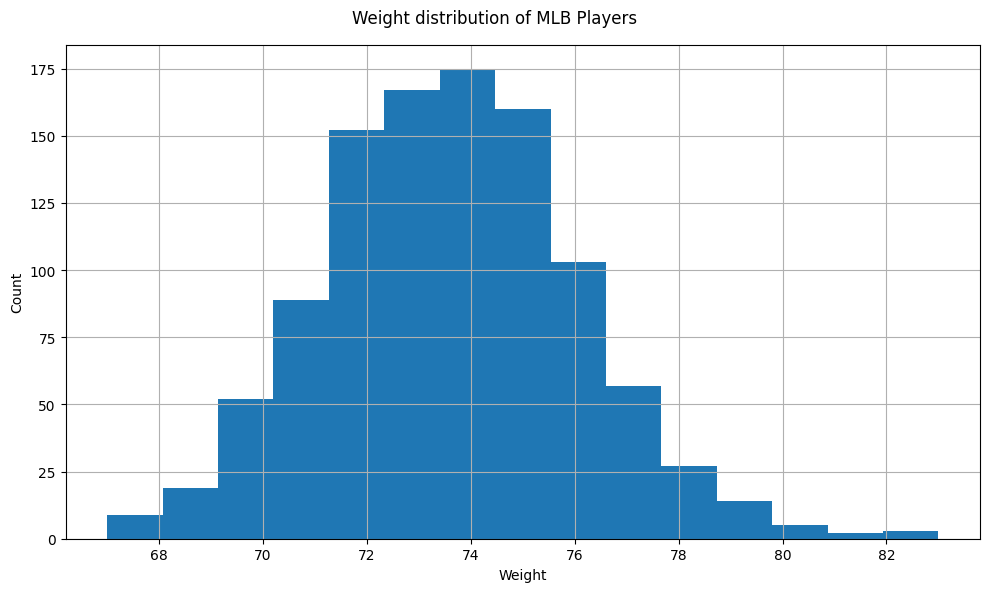

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Distribusi Normal

Mari kita buat sampel berat buatan yang mengikuti distribusi normal dengan rata-rata dan varians yang sama seperti data asli kita:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

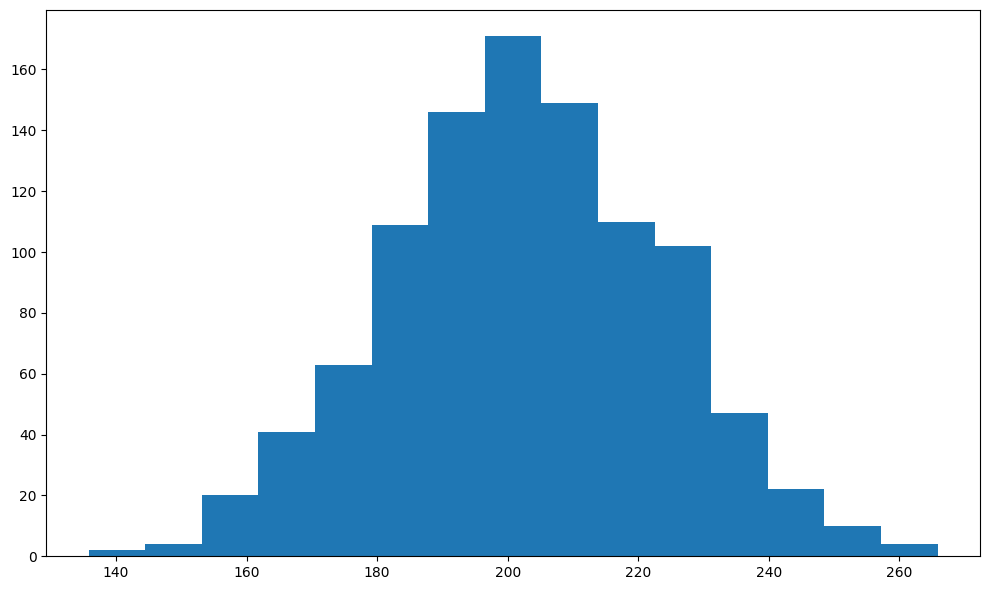

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

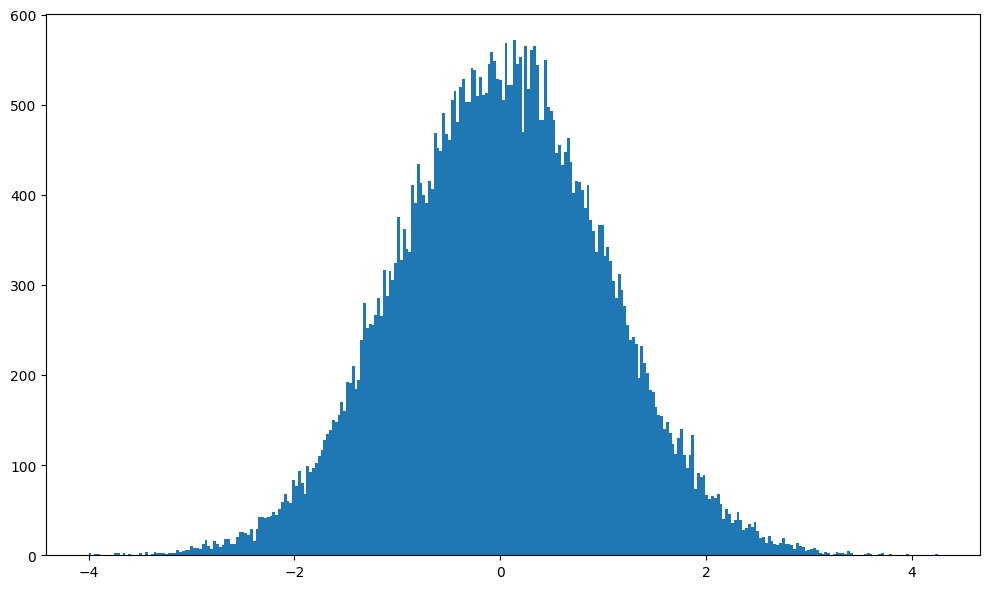

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

Karena sebagian besar nilai dalam kehidupan nyata terdistribusi normal, kita tidak seharusnya menggunakan generator angka acak uniform untuk menghasilkan data sampel. Berikut adalah apa yang terjadi jika kita mencoba menghasilkan berat dengan distribusi uniform (dihasilkan oleh `np.random.rand`):


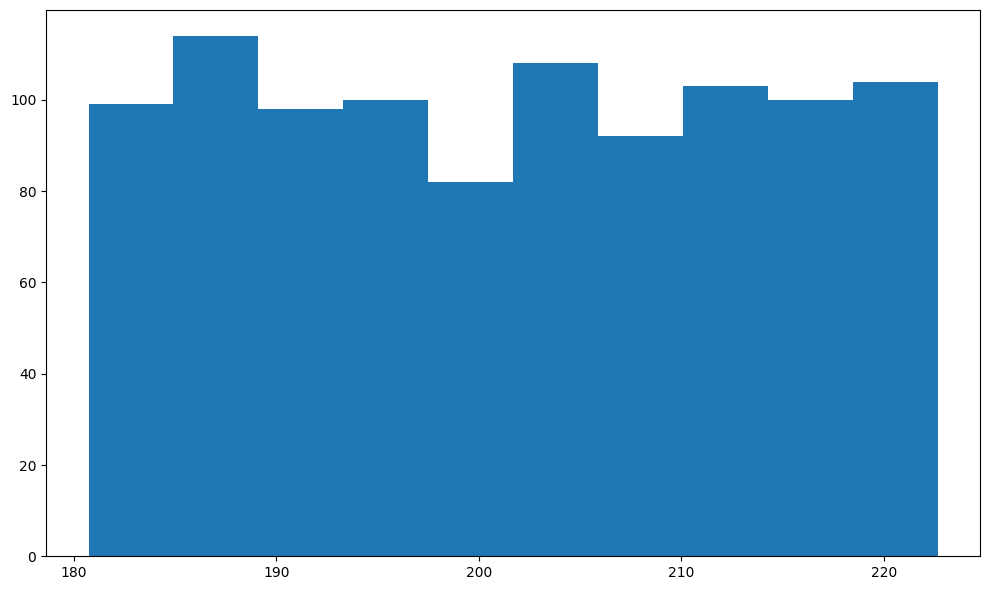

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## Interval Kepercayaan

Sekarang, mari kita hitung interval kepercayaan untuk berat dan tinggi badan pemain baseball. Kita akan menggunakan kode [dari diskusi stackoverflow ini](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## Pengujian Hipotesis

Mari kita jelajahi berbagai peran dalam dataset pemain baseball kita:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


Kita dapat melihat bahwa interval tersebut tidak saling tumpang tindih.

Cara yang secara statistik lebih tepat untuk membuktikan hipotesis adalah dengan menggunakan **Student t-test**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


Dua nilai yang dikembalikan oleh fungsi `ttest_ind` adalah:
* p-value dapat dianggap sebagai probabilitas bahwa dua distribusi memiliki rata-rata yang sama. Dalam kasus kita, nilainya sangat rendah, yang berarti ada bukti kuat bahwa pemain base pertama lebih tinggi.
* t-value adalah nilai perbedaan rata-rata yang dinormalisasi yang digunakan dalam uji-t, dan nilai ini dibandingkan dengan nilai ambang untuk tingkat kepercayaan tertentu.


## Mensimulasikan Distribusi Normal dengan Teorema Limit Tengah

Generator pseudo-acak di Python dirancang untuk memberikan distribusi uniform. Jika kita ingin membuat generator untuk distribusi normal, kita dapat menggunakan teorema limit tengah. Untuk mendapatkan nilai yang terdistribusi normal, kita hanya perlu menghitung rata-rata dari sampel yang dihasilkan secara uniform.


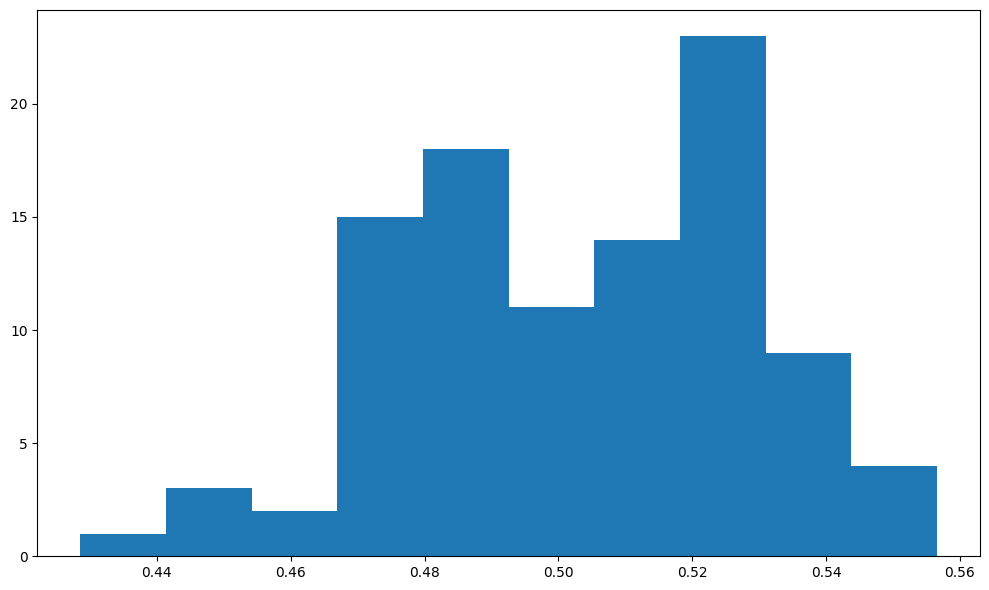

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## Korelasi dan Perusahaan Baseball Jahat

Korelasi memungkinkan kita menemukan hubungan antara urutan data. Dalam contoh sederhana kita, mari kita berpura-pura ada sebuah perusahaan baseball jahat yang membayar pemainnya berdasarkan tinggi badan mereka - semakin tinggi pemain, semakin banyak uang yang dia dapatkan. Misalkan ada gaji dasar sebesar $1000, dan bonus tambahan dari $0 hingga $100, tergantung pada tinggi badan. Kita akan mengambil data pemain nyata dari MLB, dan menghitung gaji imajiner mereka:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


Mari kita hitung kovarians dan korelasi dari urutan tersebut. `np.cov` akan memberikan kita **matriks kovarians**, yang merupakan perluasan kovarians ke beberapa variabel. Elemen $M_{ij}$ dari matriks kovarians $M$ adalah korelasi antara variabel input $X_i$ dan $X_j$, dan nilai diagonal $M_{ii}$ adalah varians dari $X_{i}$. Demikian pula, `np.corrcoef` akan memberikan kita **matriks korelasi**.


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


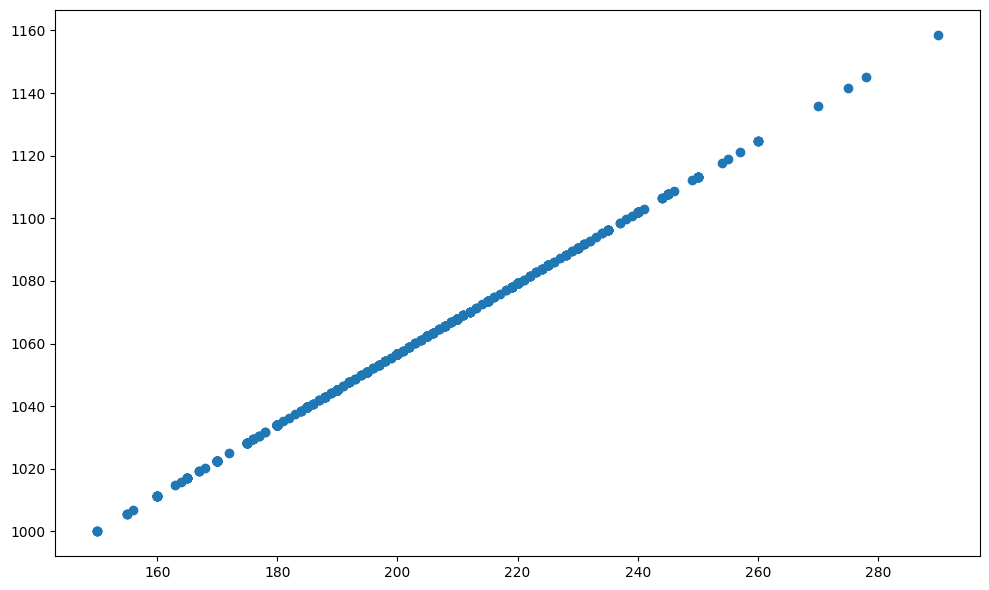

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


Dalam kasus ini, korelasinya sedikit lebih kecil, tetapi masih cukup tinggi. Sekarang, untuk membuat hubungan tersebut menjadi kurang jelas, kita mungkin ingin menambahkan beberapa keacakan tambahan dengan menambahkan beberapa variabel acak ke gaji. Mari kita lihat apa yang terjadi:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


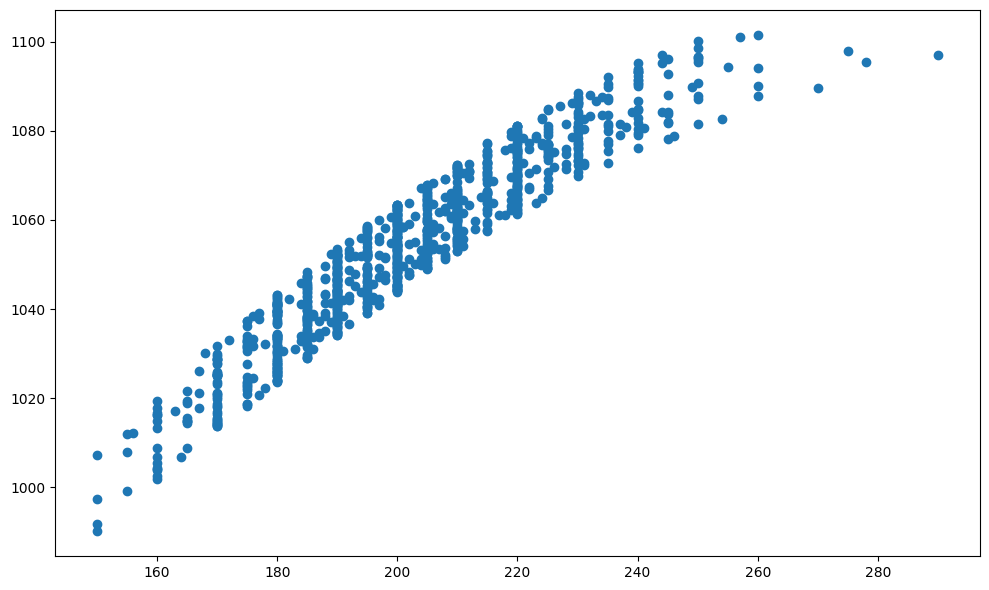

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

> Bisakah Anda menebak mengapa titik-titik tersebut membentuk garis vertikal seperti ini?

Kami telah mengamati korelasi antara konsep yang direkayasa secara artifisial seperti gaji dan variabel yang diamati *tinggi badan*. Sekarang, mari kita lihat apakah dua variabel yang diamati, seperti tinggi badan dan berat badan, juga saling berkorelasi:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

Sayangnya, kami tidak mendapatkan hasil apa pun - hanya beberapa nilai `nan` yang aneh. Hal ini terjadi karena beberapa nilai dalam seri kami tidak terdefinisi, yang diwakili sebagai `nan`, sehingga hasil operasi juga menjadi tidak terdefinisi. Dengan melihat matriks, kita dapat melihat bahwa kolom `Weight` adalah kolom yang bermasalah, karena korelasi diri antara nilai `Height` telah dihitung.

> Contoh ini menunjukkan pentingnya **persiapan data** dan **pembersihan data**. Tanpa data yang tepat, kita tidak dapat menghitung apa pun.

Mari kita gunakan metode `fillna` untuk mengisi nilai yang hilang, dan menghitung korelasi:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

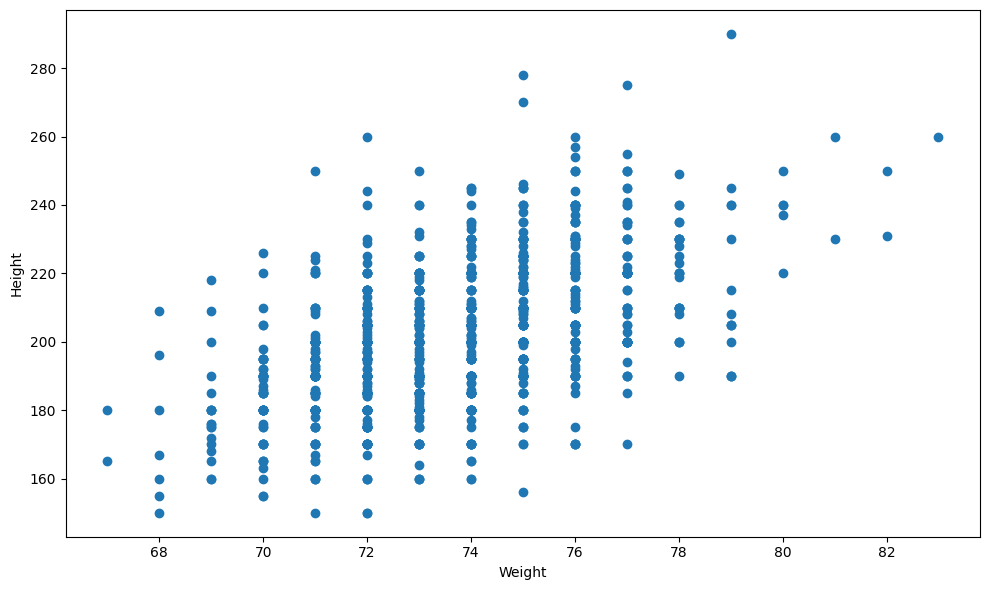

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## Kesimpulan

Dalam notebook ini, kita telah mempelajari cara melakukan operasi dasar pada data untuk menghitung fungsi statistik. Kita sekarang memahami cara menggunakan perangkat matematika dan statistik yang baik untuk membuktikan beberapa hipotesis, serta cara menghitung interval kepercayaan untuk variabel sembarang berdasarkan sampel data.



---

**Penafian**:  
Dokumen ini telah diterjemahkan menggunakan layanan terjemahan AI [Co-op Translator](https://github.com/Azure/co-op-translator). Meskipun kami berupaya untuk memberikan hasil yang akurat, harap diperhatikan bahwa terjemahan otomatis mungkin mengandung kesalahan atau ketidakakuratan. Dokumen asli dalam bahasa aslinya harus dianggap sebagai sumber yang berwenang. Untuk informasi yang bersifat kritis, disarankan menggunakan jasa terjemahan manusia profesional. Kami tidak bertanggung jawab atas kesalahpahaman atau interpretasi yang keliru yang timbul dari penggunaan terjemahan ini.
